In [1]:
import os, sys
import pandas as pd 
import numpy as np 
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt 


In [2]:
#Definir las rutas de los directorios 
from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent 

In [3]:
query = """
SELECT  
  *
FROM 
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` 

LIMIT 
  1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


In [4]:
# get only numeric colums 
numerics = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [5]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

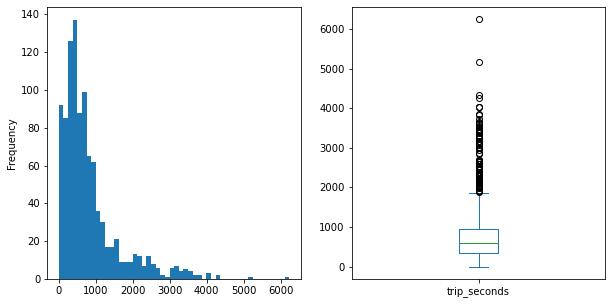

In [6]:
fig, ax = plt.subplots(ncols =2, nrows=1,figsize=(10,5))
num_df['trip_seconds'].plot(kind='hist',bins=50, ax=ax[0])
num_df['trip_seconds'].plot(kind='box')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


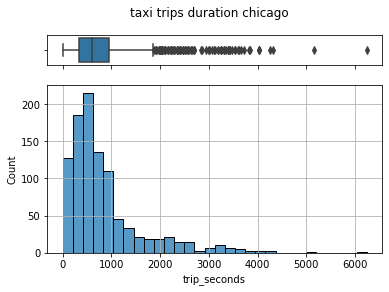

In [7]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#sharex es compartir el eje x 
#ax_box nombre de la grafica de arriba 
#ax_his nombre de la grafica de abajo 
# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
#f.savefig(plot_path)

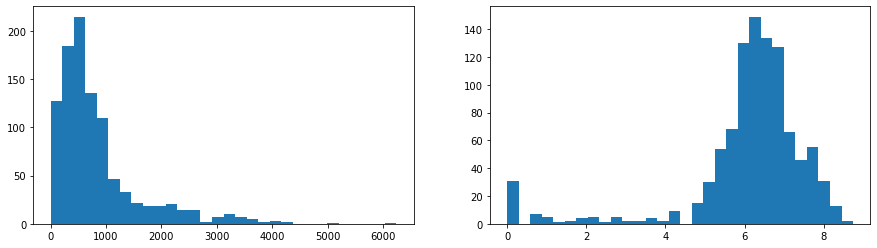

In [8]:
#log-transform 
x = num_df['trip_seconds']
log_x = np.log(x+1)
#numpy trasforma toda la columna
f, ax = plt.subplots(1,2, figsize =(15,4))

ax[0].hist(x, bins=30)
ax[1].hist(log_x, bins=30);
#El ; para que no salgan el monton de numeros y solo salga la grafica 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

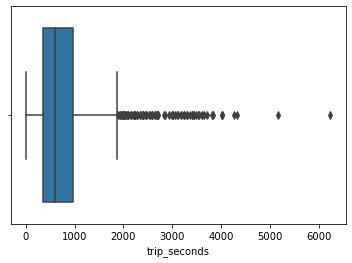

In [9]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

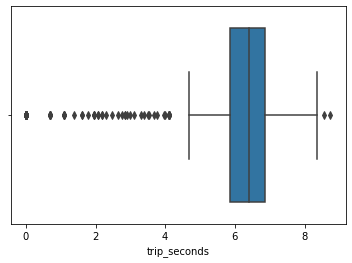

In [10]:
sns.boxplot(log_x)

In [11]:
log_x.describe()  #info estadistica basica 
log_x.mean() #la mediana 

6.101626616629768

In [12]:
np.exp(log_x.mean())

446.58359990923947

In [13]:
x.mean()

827.44

(0.0, 10.0)

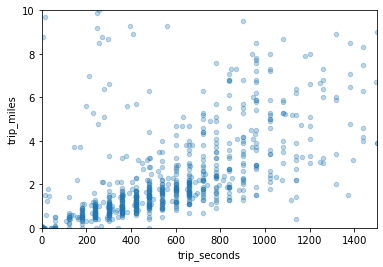

In [14]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_miles', alpha=0.3) #alpha es 
plt.xlim(0,1500)
plt.ylim(0,10)

In [15]:
x = 'trip_seconds'
y = 'trip_miles'
num_df [[x,y]].corr() #solo analisamos la correlacion lineal

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

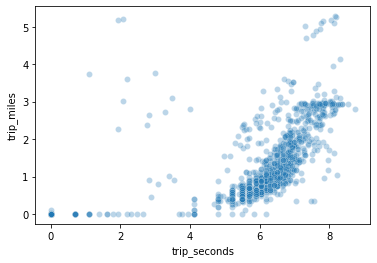

In [16]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)
sns.scatterplot( x=log_x, y=log_y, alpha=0.3)

In [17]:
log_num_df = pd.DataFrame(
    columns = [x,y]
)
log_num_df[x] = log_x
log_num_df[y] = log_y

log_num_df.corr()


,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


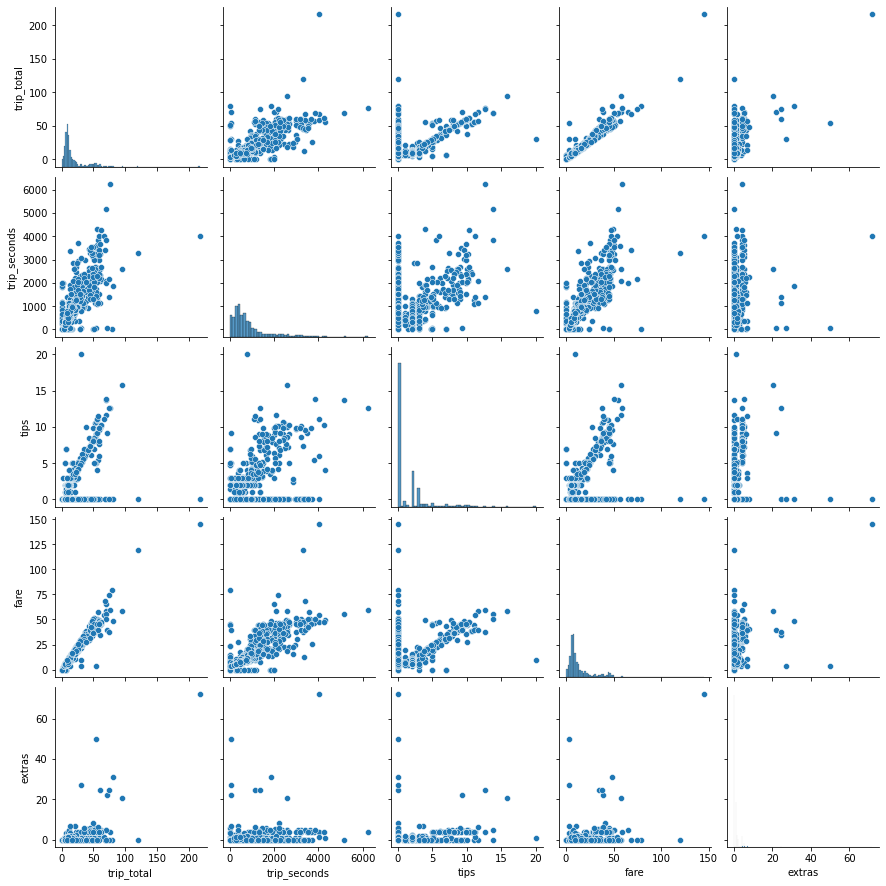

In [18]:
cols = ['trip_total', 'trip_seconds', 'tips', 'fare', 'extras']
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

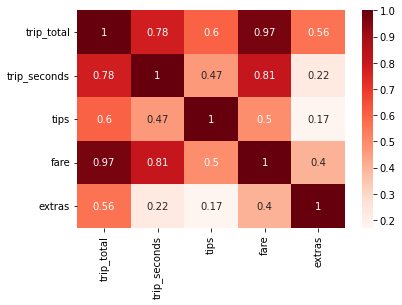

In [19]:
correlations = num_df[cols].corr()
sns.heatmap(correlations, cmap = 'Reds', annot = True)

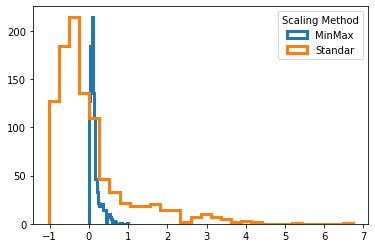

In [20]:
x = num_df['trip_seconds']
x_min = x.min()
x_max = x.max()
x_mean = x.mean() #Media
x_std = x.std()
x_MinMax_scaled = ((x-x_min)/(x_max - x_min)) #MinMax Scaler
x_std_scaled = (x-x_mean)/x_std

plt.hist(x_MinMax_scaled,bins=30, label='MinMax', histtype='step', lw=3)  #MinMax Scaled
plt.hist(x_std_scaled   ,bins=30, label='Standar',histtype='step', lw=3); #Standard Scaler

plt.legend(title='Scaling Method')

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler().fit(num_df[cols]) #entreno el modelo 
data_min_max_scaled = minmax_scaler.transform(num_df[cols])  #trasformo  de acuerdo a lo entrenado 

In [22]:
num_df[cols]

,trip_total,trip_seconds,tips,fare,extras
0,9.25,600,2.00,6.75,0.0
1,21.50,960,0.00,21.50,0.0
2,37.00,3000,0.00,37.00,0.0
3,46.58,2220,6.08,35.50,4.5
4,52.40,1560,8.65,39.25,4.0
...,...,...,...,...,...
995,26.00,2040,0.00,26.00,0.0
996,9.50,480,0.00,8.00,1.5
997,23.30,1260,3.80,19.00,0.0
998,9.25,720,0.00,9.25,0.0


In [23]:
data_min_max_scaled

array([[0.04258261, 0.09615385, 0.1       , 0.04648596, 0.        ],
       [0.09903682, 0.15384615, 0.        , 0.14821712, 0.        ],
       [0.17046869, 0.48076923, 0.        , 0.25512104, 0.        ],
       ...,
       [0.10733214, 0.20192308, 0.19      , 0.13097455, 0.        ],
       [0.04258261, 0.11538462, 0.        , 0.06372853, 0.        ],
       [0.07484216, 0.15384615, 0.        , 0.11200772, 0.        ]])

In [24]:
num_df_minmax_scaled = pd.DataFrame(
    columns = num_df[cols].columns,
    data    = data_min_max_scaled 
)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


# TRABAJO 07/05/2022

---------------------------------------

PRIMER PUNTO: GRAFICAR HISTOGRAMA Y GRAFICO DE CAJAS PARA TODAS LAS VARIBALES

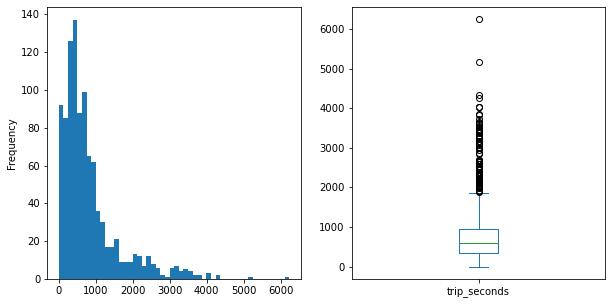

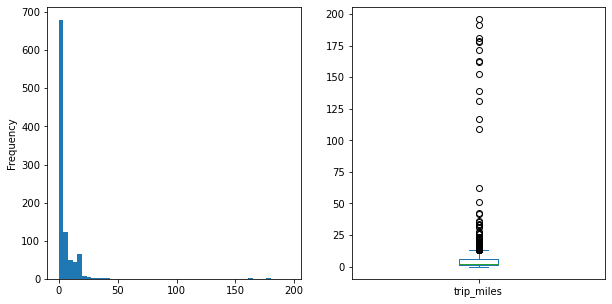

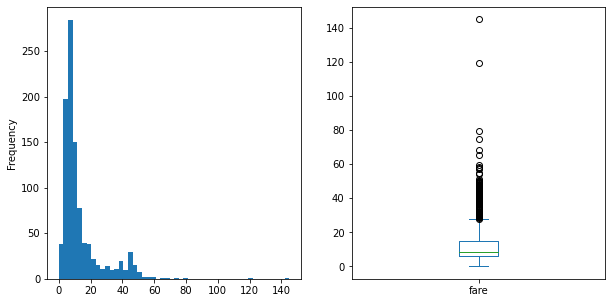

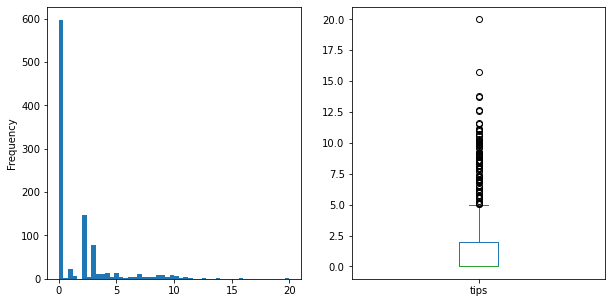

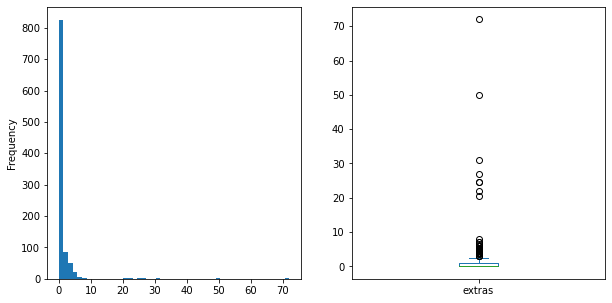

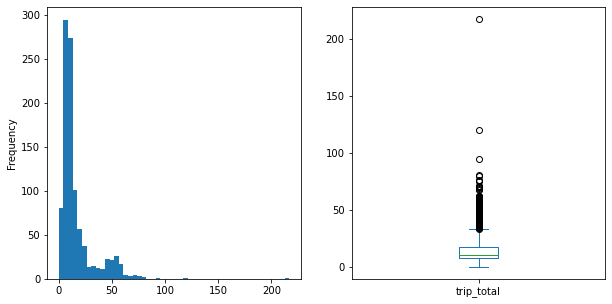

In [25]:
variables = ['trip_seconds','trip_miles','fare','tips','extras','trip_total'] ##,num_df['tips'],num_df['extras']
for i in variables:
    fig, ax = plt.subplots(ncols =2, nrows=1,figsize=(10,5))
    num_df[i].plot(kind='hist',bins=50, ax=ax[0])
    num_df[i].plot(kind='box')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

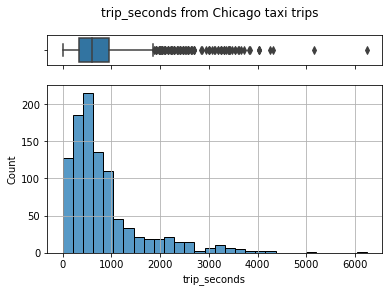

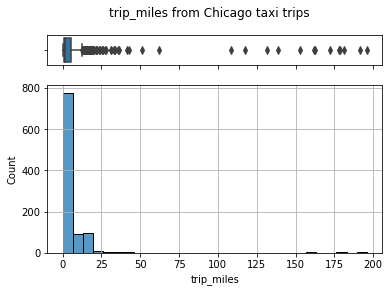

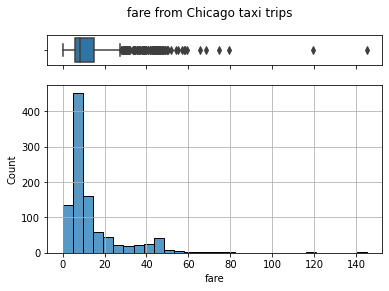

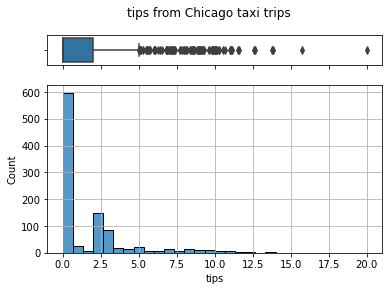

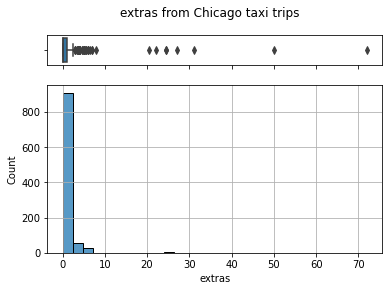

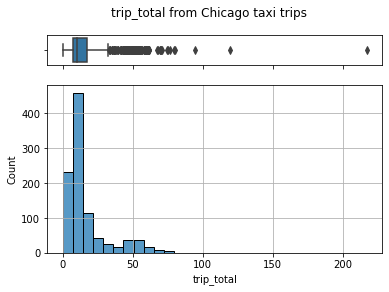

In [26]:
count = 0 
for i in variables:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(num_df[i], ax=ax_box)
    sns.histplot(data=num_df, x= i , bins=30, ax=ax_hist)
    ax_box.set(xlabel='')
    subtitle = variables[count] + " from Chicago taxi trips"
    plt.suptitle(subtitle)
    ax_hist.grid()
    count=count + 1
#plot_path = os.path.join(project_dir, 'reports', 'plots', subtitle )

SEGUNDO PUNTO A: HACER TABLAS DE CORRELACION Y GRAFICOS DE DISPERCION DE TODAS LAS VARIBLES RESPECTO A "trip_seconds"

In [27]:
variables2 = variables[1:]
variables2

['trip_miles', 'fare', 'tips', 'extras', 'trip_total']

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


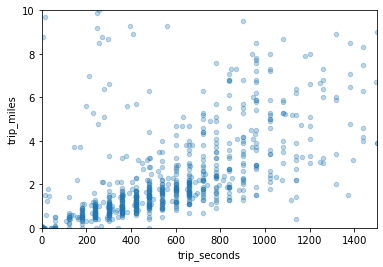

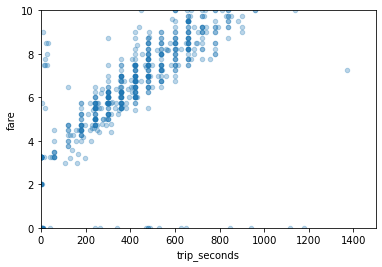

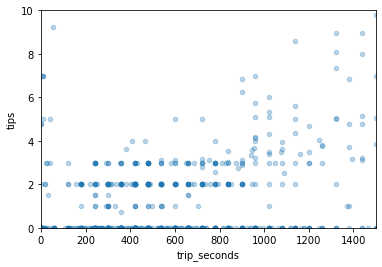

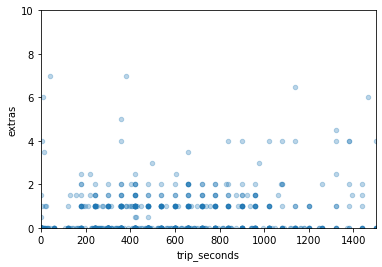

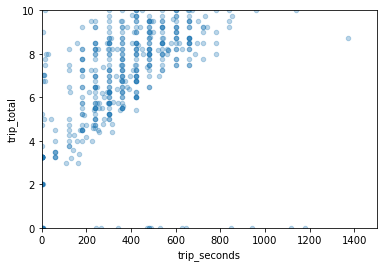

In [28]:
count = 0 
for i in variables2:
    X = 'trip_seconds' 
    Y =  variables2[count]
    num_df.plot(kind='scatter', x= X, y=Y, alpha=0.3)
    plt.xlim(0,1500)
    plt.ylim(0,10) 
    corr = num_df [[X,Y]].corr() #solo analisamos la correlacion lineal
    display(corr)
    count = count + 1

SEGUNDO PUNTO B: HACER TABLAS DE CORRELACION Y GRAFICOS DE DISPERCION DE TODAS LAS VARIBLES RESPECTO A "trip_seconds" (en base logaritmica)

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


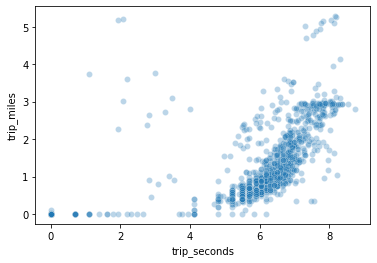

In [29]:
def grafica(z):
    X = 'trip_seconds' 
    Y =  variables2[z]
    log_x = np.log(num_df[X]+1)
    log_y = np.log(num_df[Y]+1)
    sns.scatterplot( x=log_x, y=log_y, alpha=0.3) 
    corr = num_df [[X,Y]].corr() #solo analisamos la correlacion lineal
    display(corr)
z=0
grafica(z)

,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


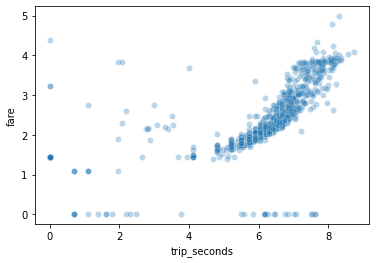

In [30]:
z=1
grafica(z)

,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


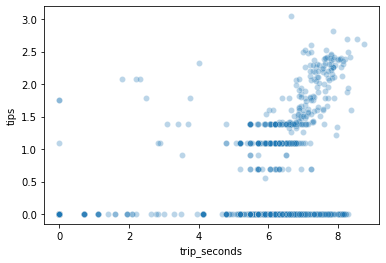

In [31]:
z=2
grafica(z)

,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


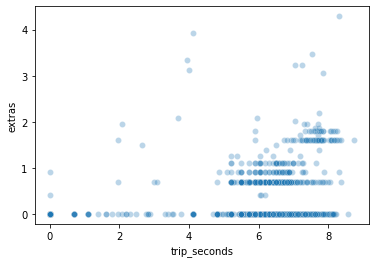

In [32]:
z=3
grafica(z)

,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


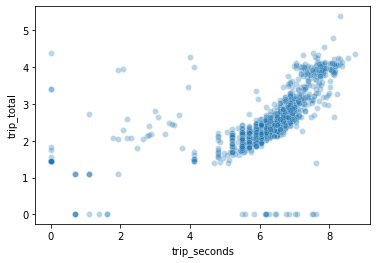

In [33]:
z=4
grafica(z)

TERCER PUNTO: MAPA DE CALOR Y SCATTER MATRIX CON VARIABLES NUMERICAS EN BASE LOGARITMICA

In [34]:
#matriz de datos numericos en base logaritmica 
num_df_log = np.log(num_df[variables]+1)
num_df_log

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,6.398595,0.587787,2.047693,1.098612,0.000000,2.327278
1,6.867974,2.151762,3.113515,0.000000,0.000000,3.113515
2,8.006701,2.653242,3.637586,0.000000,0.000000,3.637586
3,7.705713,2.580217,3.597312,1.957274,1.704748,3.862413
4,7.353082,2.809403,3.695110,2.266958,1.609438,3.977811
...,...,...,...,...,...,...
995,7.621195,2.312535,3.295837,0.000000,0.000000,3.295837
996,6.175867,1.029619,2.197225,0.000000,0.916291,2.351375
997,7.13966,1.945910,2.995732,1.568616,0.000000,3.190476
998,6.580639,0.993252,2.327278,0.000000,0.000000,2.327278


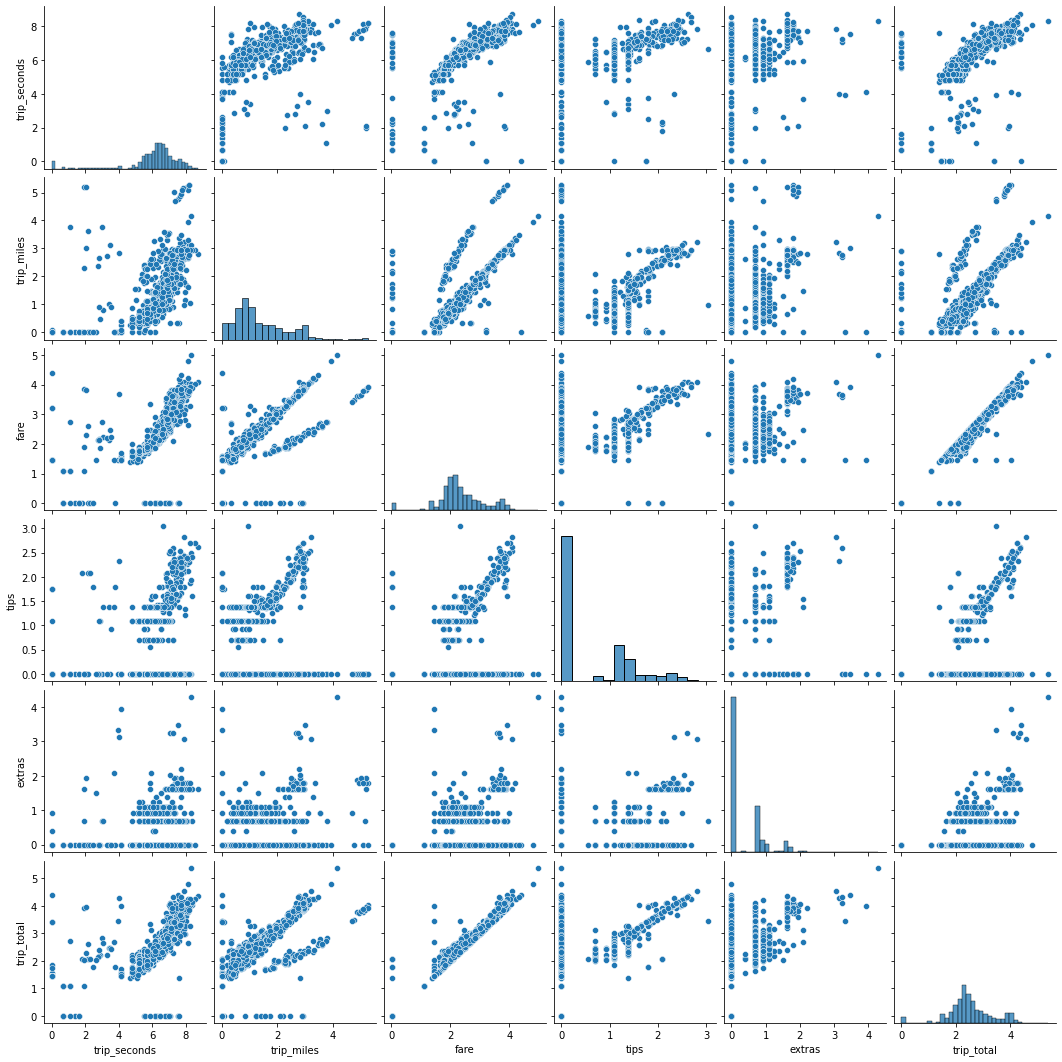

In [35]:
sns.pairplot(data=num_df_log)

<AxesSubplot:>

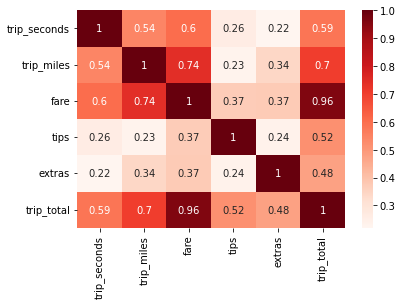

In [36]:
correlations = num_df_log[variables].corr()
sns.heatmap(correlations, cmap = 'Reds', annot = True)

CUARTO PUNTO: ESTUDIO DE CORRELACIONES CON MINMAX SCALER Y STANDARD SCALER 

In [37]:
display(num_df_minmax_scaled)

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556
...,...,...,...,...,...
995,0.119775,0.326923,0.0000,0.179254,0.000000
996,0.043735,0.076923,0.0000,0.055107,0.020833
997,0.107332,0.201923,0.1900,0.130975,0.000000
998,0.042583,0.115385,0.0000,0.063729,0.000000


In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standar_scaler = MinMaxScaler().fit(num_df[cols]) #entreno el modelo 
data_standar_scaled = standar_scaler.transform(num_df[cols])  #trasformo  de acuerdo a lo entrenado 

In [39]:
num_df_standar_scaled = pd.DataFrame(
    columns = num_df[cols].columns,
    data    = data_standar_scaled 
)
num_df_standar_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


Scatter matrix con Standar Scaler 

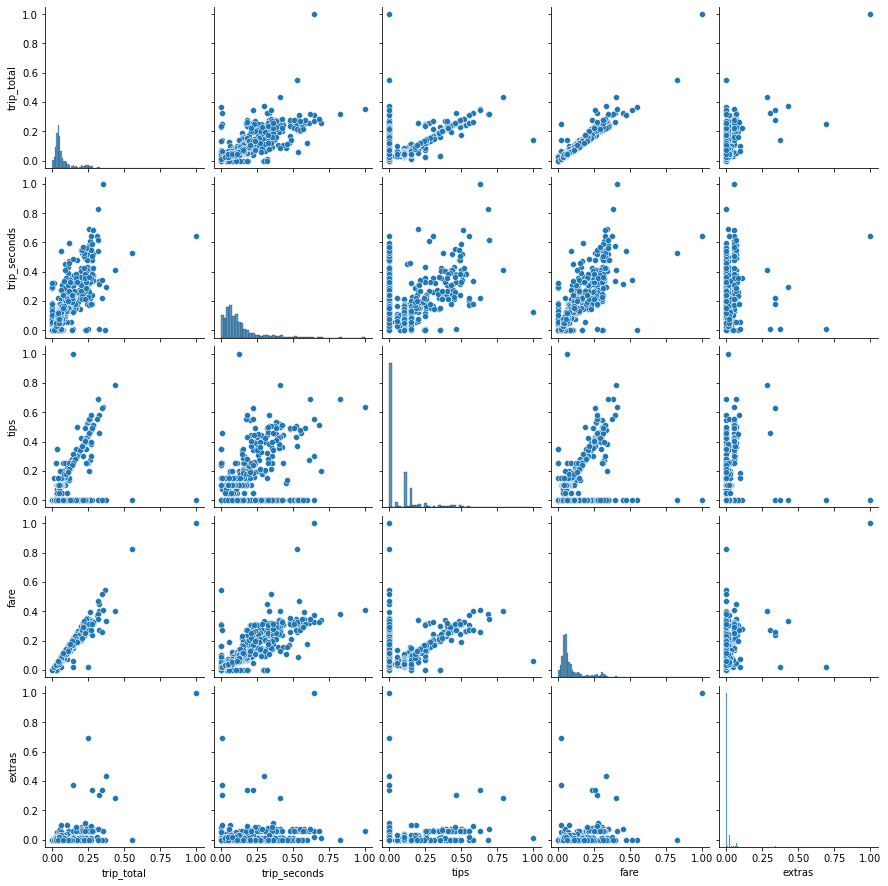

In [40]:
sns.pairplot(data=num_df_standar_scaled)

Scatter matrix con MixMax escaler 

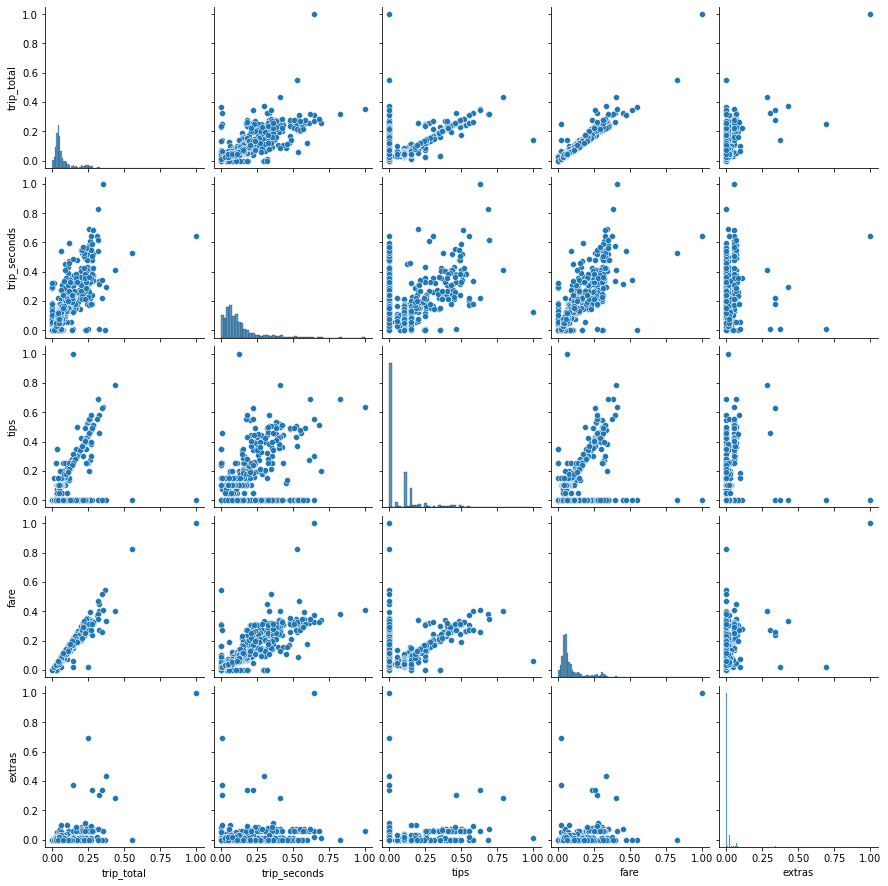

In [41]:
sns.pairplot(data=num_df_minmax_scaled)

Analisis de las diferentes correlaciones 

<AxesSubplot:title={'center':'Raw data'}>

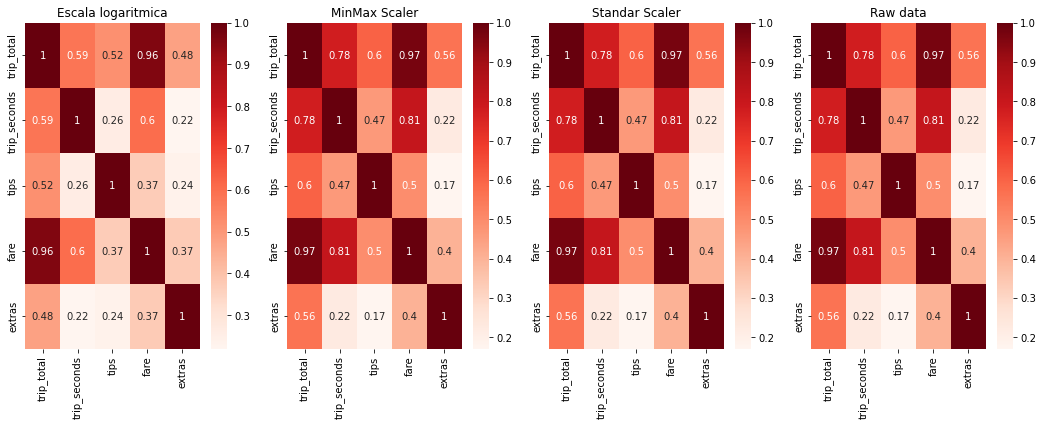

In [44]:
fig, ax = plt.subplots(ncols =4, nrows=1,figsize=(18,6))
correlations = num_df_log[cols].corr()
ax[0].set_title('Escala logaritmica')
sns.heatmap(correlations, cmap = 'Reds', annot = True,ax=ax[0])
correlationsMinMax = num_df_minmax_scaled[cols].corr()
ax[1].set_title('MinMax Scaler')
sns.heatmap(correlationsMinMax, cmap = 'Reds', annot = True,ax=ax[1])
correlationsStandard = num_df_standar_scaled[cols].corr()
ax[2].set_title('Standar Scaler')
sns.heatmap(correlationsStandard, cmap = 'Reds', annot = True,ax=ax[2])
corr = num_df[cols].corr()
ax[3].set_title('Raw data')
sns.heatmap(corr, cmap = 'Reds', annot = True,ax=ax[3])


Se puede evidenciar que las correlaciones entre las variables obtenidas al reescalar los datos, ya sea mediante MinMax Scaler o Standar Scaler, son iguales. Por otro lado las correlaciones entre las variables al utilizar una trasformacion logaritmica de los datos, son diferentes. 